# Gas power plant. Two uncertainties in Guthrie's example 
- This notebook was created as an attempt to handle problem of two uncertainties in modelling the value of gas power plant. 
- Guthrie's example copes only with the uncertainty of the electricity price. The price of gas is not modelled. 
- In this example I will try to model also the unceratinty about gas price. 

## Model and basic variables. 
- There will be 5 discrete dates in which the cash flow is obtained, and decisions about suspension can be made. 
- At each time epoch a decision is made to operate the power plant or not. According to the decision a cash flow is obtained as a difference between the input price of gas and the output price of power. Units are expected to be normalized, meaning that cash flow is defined as (price of electricity)-(price of gas). 
- Discounted cash flow by 1 unit of time is casf flow divided by the discount rate. In our case 1.05. 
- Starting price of electricity is given as \$40, $35 for gas. Up and down movements are set as U_g = 1.1, D_g = 1/1.1, U_e = 1.2 and D_e = 1/1.2. Probabilities of up and down movements of both electricity price and gas price are defined as p_ue = 0.4, p_de = 0.6, p_ug = 0.4 and p_dg = 0.6. 
- 

In [1]:
import numpy as np

In [11]:
R = 1.05

E_0 = 40
G_0 = 35

U_g = 1.1
U_e = 1.2
D_g = 1/U_g
D_e = 1/U_e

p_ue = 0.4
p_de = 1-p_ue
p_ug = 0.4
p_dg = 1-p_ug

n_max = 6

In [99]:
Y = np.zeros((n_max,n_max,n_max))

In [100]:
for i in range(0,n_max):
    for j in range(0,n_max):
        for n in range(0,n_max):
            Y[i][j][n] = E_0*pow(U_e,2*i-n)-G_0*pow(U_g,2*j-n)
          
        

In [101]:
V = np.zeros((n_max, n_max, n_max))

- Now lets define joint probabilities of the evolution. 

In [102]:
p_uu = p_ue*p_ug
p_ud = p_ue*p_dg
p_du = p_de*p_ug
p_dd = p_de*p_dg

In [103]:
for n_left in range(1,n_max):
    for i in range(0,n_max-n_left): 
        for j in range(0,n_max-n_left):
            n = n_max-n_left-1
            V[i][j][n] = Y[i][j][n]+(p_uu*V[i+1][j+1][n+1]+p_ud*V[i+1][j][n+1]+p_du*V[i][j+1][n+1]+p_dd*V[i][j][n+1])/R

In [104]:
V[0,0,0]

20.285367920192662

In [105]:
V[1][0][1]

57.628375172115

## Now the suspension of production is allowed. 

In [106]:
Y_susp = np.zeros((n_max,n_max,n_max))

In [107]:
for i in range(0,n_max):
    for j in range(0,n_max):
        for n in range(0,n_max):
            Y_susp[i][j][n] = max(E_0*pow(U_e,2*i-n)-G_0*pow(U_g,2*j-n),0)
            
          

In [108]:
V_susp = np.zeros((n_max, n_max, n_max))

In [110]:
for n_left in range(1,n_max):
    for i in range(0,n_max-n_left): 
        for j in range(0,n_max-n_left):
            n = n_max-n_left-1
            V_susp[i][j][n] = Y_susp[i][j][n]+(p_uu*V_susp[i+1][j+1][n+1]+p_ud*V_susp[i+1][j][n+1]+p_du*V_susp[i][j+1][n+1]+p_dd*V_susp[i][j][n+1])/R

In [111]:
V_susp[0][0][0]

29.737343253146737

In [112]:
V_susp[0][0][4]

0.0

In [65]:
np.amax(V_susp)

82.65642911458689

In [66]:
np.amin(V_susp)

0.0

## 3D visualisation failed. 
- Could be done in R, but I cannot find an easy way to transport the data from V variable to R. 

In [68]:
i = range(0,n_max)
j = range(0,n_max)
n = range(0,n_max)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning:

invalid value encountered in sqrt



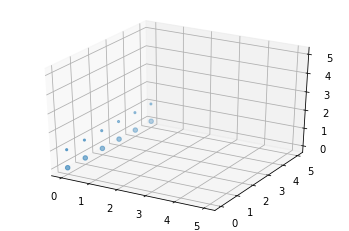

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
counter = range(n_max)
i,j,n = np.meshgrid(counter, counter, counter)
ax.scatter(i,j,n, s=V[i][j][n])

plt.show()

In [94]:
 np.save("V.npy", V)
